# TP2 CompStats

David Soto

# Exercise 1

**Question 1**

Afin de générer une variable aléatoire $X$ avec la distribution discrète demandée, on commence par définir $ \forall i = {1,...,n} $: $$ S_i = \sum_{j = 1}^i p_j $$

On pose $U \sim \mathcal{Uniform}([0,1[)$. On a alors par définition de $U$ que $ \forall i = {2,...,n} $ : $$ \mathbb{P} \left( U \in [S_{i-1}, S_i[ \right) = S_i - S_{i-1} = p_i = \mathbb{P}(X = x_i) $$

Finalement comme les $[S_{i−1}​,S_i​[$ forment une partition de $[0,1[$, on peut poser : $$ X = \sum_{i = 1}^n x_i \unicode{x1D7D9}_{[S_{i-1}, S_i[}(U) $$

Ce qui génère bien une variable aléatoire avec la distribution discrète demandée.

**Question 2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse

def S(p):
	# La fonction prend en entrée le vecteur p contenant les probabilités pi
	S = [0]
	n = len(p)
	for pi in p:
		S.append(S[-1]+pi)
	S = np.array(S)
	return S
 

def generate(S, n):
	# Fonction qui génère une suite iid 
	U = sorted(np.random.rand(n)) # returns a sorted vector of size n containing random values in [0,1]
	X = [] # vecteur sample
	i = 1
	for u in U:
		while u >= S[i]:
			i += 1
		X.append(i)
	X = np.array(X)
	np.random.shuffle(X)
	return X


In [ ]:
# Exemple pour un échantillon de taille 10
n = 10
p = np.random.rand(n) # returns a vector of size n containing random values in [0,1]
p /= sum(p) # normalizes the values in p so that we obtain a probability distribution (pi)
S = S(p)
N = 10
X = generate(S, N)
X

array([ 4,  4,  1,  1, 10,  4, 10,  4,  4, 10])

**Question 3**

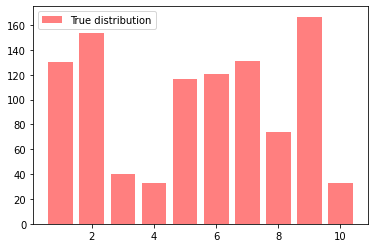

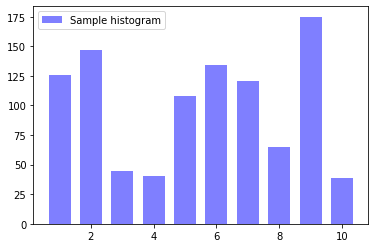

In [ ]:

# Parameters 
n = 10 # size of the vector of probability distribution
N = 1000 # size of the sample
##########################

def S(p):
	# La fonction prend en entrée le vecteur p contenant les probabilités pi
	S = [0]
	n = len(p)
	for pi in p:
		S.append(S[-1]+pi)
	S = np.array(S)
	return S


p = np.random.rand(n) # returns a vector of size n containing random values in [0,1]
p /= sum(p) # normalizes the values in p so that we obtain a probability distribution (pi)
S = S(p)
X = generate(S, N)

plt.figure()
plt.bar([1+i for i in range(n)], N*p, color='r', alpha=0.5, label='True distribution')
plt.legend()
plt.show()
plt.figure()
plt.hist(X, [0.5+i for i in range(n+1)], rwidth=0.7, color='b', alpha=0.5, label='Sample histogram')
plt.legend()
plt.show()

# Exercise 2

**Question 1**

Le vecteur paramètre $ \theta$ est donnée par :
$$ \theta = (\alpha,\mu_1,...,\mu_m,\Sigma_1,...,\Sigma_m)$$
On a $\forall i = 1,...,n$ : $Z_i \sim \mathcal{M}(1, \alpha_1,...,\alpha_m)  $ sont les variables latente du modèle. 

En utilisant la formule des probabilités totales, on a que $\forall i = 1,...,n$ :
$$ f_\theta(x_i) = \sum_{j = 1}^m f_\theta(X_i = x_i | Z_i = j) f_\theta(Z_i = j)  $$
$$ f_\theta(x_i) = \sum_{j = 1}^m \mathbb{P}_\theta(X_i = x_i | Z_i = j) \mathbb{P}_\theta(Z_i = j) $$
$$ f_\theta(x_i) = \sum_{j = 1}^m \mathcal{N}(x_i ; \mu_j,\Sigma_j ) \alpha_j $$

On obtient donc :
$$ \mathcal{L}(x_1,...,x_n; \theta)  = \prod_{i=1}^n f_\theta(x_i) = \prod_{i=1}^n [\sum_{j = 1}^m \mathcal{N}(x_i ; \mu_j,\Sigma_j ) \alpha_j] $$




Or $\forall i=1,..,n$ on a que :
$$ \mathcal{N}(x_i ; \mu_j,\Sigma_j ) \alpha_j = \alpha_j \dfrac{1}{(2 \pi)^{d / 2} | \Sigma_j |^{1/2}} \exp \left( - \dfrac{1}{2} (x_i - \mu_j)^T \Sigma_j^{-1} (x_i - \mu_j) \right) $$
On obtient ainsi l'expression de la vraissemblance, qui est donnée par :
$$ \mathcal{L}(x_1, ..., x_n; \theta) = \prod_{i = 1}^n [\sum_{j = 1}^m \alpha_j \dfrac{1}{(2 \pi)^{d / 2} | \Sigma_j |^{1/2}} \exp \left( - \dfrac{1}{2} (x_i - \mu_j)^T \Sigma_j^{-1} (x_i - \mu_j) \right)] $$

La log-vraisemblance est donnée par :

$$ L(x_1,...,x_n; \theta) = \sum_{i = 1}^n \log [\sum_{j = 1}^m \mathcal{N}(x_i ; \mu_j,\Sigma_j ) \alpha_j]$$

**Question 2**

In [ ]:
# Sample a set of observation according to a gaussian mixture law

# Dimensions
m = 3
n = 1000
w = 80
h = 40


In [ ]:
def S(p):
	# La fonction prend en entrée le vecteur p contenant les probabilités pi
	S = [0]
	n = len(p)
	for pi in p:
		S.append(S[-1]+pi)
	S = np.array(S)
	return S

def random_mixture(m, w, h):
	# Generate alpha
	alpha = np.random.rand(m)
	alpha /= sum(alpha)
	
	sig = 0.15 * np.sqrt(w*h/m)
	mu = np.random.rand(m, 2) * np.array([w-2*sig, h-2*sig]) + np.array([sig, sig])
	
	sigma = []
	for j in range(m):
		v1, v2, angle = np.random.rand(3) * [0.7*sig, 0.4*sig, 2*np.pi] + [0.3*sig, 0.2*sig, 0]
		c, s = np.cos(angle), np.sin(angle)
		D = np.diag([v1*v1, v2*v2])
		R = np.matrix([[c, -s], [s, c]])
		S = R * D * R.transpose()
		sigma.append(S)
	sigma = np.array(sigma)
	return alpha, mu, sigma

def plot_gaussians(mu, sigma, ax, color='r'):
	m = len(mu)
	plt.scatter(mu[:,0], mu[:,1], color=color, s=0.8)
	for j in range(m):
		w, v = np.linalg.eigh(sigma[j])
		for mul in [1.0, 1.8, 2.6]:
			angle = np.math.atan2(v[1, 0], v[0, 0])
			el = Ellipse(mu[j], mul*w[0]**0.5, mul*w[1]**0.5, 180/np.pi*angle, facecolor='none', edgecolor=color, linestyle='--', linewidth=0.8)
			ax.add_patch(el)

def plot_observations(X):
    plt.scatter(X[:,0], X[:,1], color='b', s=5e2/len(X))
    x0, x1 = min(X[:,0]), max(X[:,0])
    y0, y1 = min(X[:,1]), max(X[:,1])
    plt.xlim(x0, x1)
    plt.ylim(y0, y1)

# parameters generation
alpha, mu, sigma = random_mixture(m, w, h)

##### Sampling a set of observation (according to the gaussian mixture law generated)

def sample(alpha, mu, sigma):
	Salpha = S(alpha)
	Z = generate(Salpha, n) - 1
	X = [np.random.multivariate_normal(mu[z], sigma[z]) for z in Z]
	X = np.array(X)
	return X


In [ ]:
# Sampling
X = sample(alpha, mu, sigma)

This is alpha :
[0.58972543 0.3491109  0.06116367]
 
This is mu :
[[45.3628922  31.65898304]
 [41.02516186  5.48100937]
 [50.63351139 14.03055163]]
 
This is sigma :
[[[ 2.30848491  1.76689191]
  [ 1.76689191  5.4522792 ]]

 [[17.59631724 -0.01993378]
  [-0.01993378  3.98668241]]

 [[ 9.24563715 -6.12498468]
  [-6.12498468 15.4141447 ]]]
 


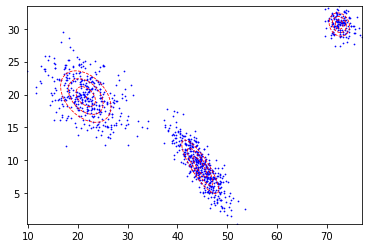

In [ ]:
##### Displaying the results & Figures

fig, ax = plt.subplots()
alpha0, mu0, sigma0 = random_mixture(m, w, h)
print("This is alpha :")
print(alpha)
print(" ")
print("This is mu :")
print(mu)
print(" ")
print("This is sigma :")
print(sigma)
print(" ")

X = sample(alpha0, mu0, sigma0)
plot_gaussians(mu0, sigma0, ax)
plot_observations(X)
plt.show()

**Question 3**

# E-step

On commence par étudier le E-step. À chaque itération t, le E-step consiste à calculer $\tau_{ij}^t = \mathbb{P}_{\theta_t}(Z_i = j \mid X_i = x_i)$, comme suit :
 $$ \tau_{ij}^t = \mathbb{P}_{\theta_t}(Z_i = j \mid X_i = x_i) \propto \mathbb{P}_{\theta_t}(Z_i = j) f_{\theta_t}(X_i = x_i \mid Z_i = j) \propto  \dfrac{\alpha_j^t}{| \Sigma_j^t |^{1/2}} \exp \left( - \dfrac{1}{2} (x_i - \mu_j^t)^T \left( \Sigma_j^t \right)^{-1} (x_i - \mu_j^t) \right) $$


# M-step

À chaque itération t, l'étape M consiste à calculer le nouveau $\theta_{t+1}$ en maximisant $Q$ qui est donnée par : 
$$ Q(\theta \mid \theta_t) = \sum_{i = 1}^n \mathbb{E}_{f_{\theta^t}(Z_i = z_i \mid X_i = x_i)} \left[ \log f_{\theta}(X_i = x_i, Z_i = z_i) \right] $$
$$ Q(\theta \mid \theta_t) = \sum_{i = 1}^n \left[ \sum_{j = 1}^m f_{\theta^t}(Z_i = j \mid X_i =x_i) \ln f_\theta(X_i = x_i, Z_i = j)\right]  = \sum_{i = 1}^n \sum_{j = 1}^m \tau_{ij}^t \ln f_\theta(X_i = x_i, Z_i = j)$$
$$ Q(\theta \mid \theta_t) = \sum_{i = 1}^n \sum_{j = 1}^m \tau_{ij}^t \ln \mathcal{N}(x_i ; \mu_j,\Sigma_j ) \alpha_j = \sum_{i = 1}^n \sum_{j = 1}^m \tau_{ij}^t \left( \ln \alpha_j - \dfrac{d}{2} \ln(2\pi) + \dfrac{1}{2} \ln \left| \Sigma_j^{-1} \right| - \dfrac{1}{2} (x_i - \mu_j)^T \Sigma_j^{-1} (x_i - \mu_j) \right) $$

On peut maximiser $Q$ par rapport à $\alpha$ indépendament des autres paramètres via le Laplacien :
$$ L(\alpha, \nu) = \sum_{i = 1}^n \sum_{j = 1}^m \tau_{ij}^t \ln \alpha_j + \nu \left( 1 - \sum_{j = 1}^m \alpha_j \right) $$
On cherche alors le $\alpha$ qui annule le gradient de L (par rapport à $\alpha$) : $$ \dfrac{\partial L}{\partial \alpha_j} = \sum_{i = 1}^n \dfrac{\tau_{ij}^t}{\alpha_j} - \nu = 0 \Leftrightarrow \alpha_j = \dfrac{1}{\nu} \sum_{i = 1}^n \tau_{ij}^t $$ 
Il suffit ensuite de normaliser via l'équation : $$ \sum_{j = 1}^m \alpha_j = \dfrac{1}{\nu} \sum_{i = 1}^n \sum_{j = 1}^m \tau_{ij}^t = \dfrac{n}{\nu} = 1 $$
Et on obtient :
$$ \hat{\alpha_j} = \dfrac{1}{n} \sum_{i = 1}^n \tau_{ij}^t $$

$ $

Pour maximiser $Q$ par rapport à $\mu_j$​, on calcule le gradient de $Q$ par rapport à $\mu_j$​ et on résoud l'équation $\dfrac{\partial Q}{\partial \mu_j} = 0$, comme suit :
$$ \dfrac{\partial Q}{\partial \mu_j} = \sum_{i = 1}^n \tau_{ij}^t \Sigma_j^{-1}  (x_i - \mu_j) = 0 \Leftrightarrow \sum_{i = 1}^n \tau_{ij}^t (\mu_j - x_i) = 0 $$
Ce qui nous donne : $$ \hat{\mu_j} = \dfrac{1}{\sum_{i = 1}^n \tau_{ij}^t} \sum_{i = 1}^n \tau_{ij}^t x_i $$

 On fait de même pour $\Sigma_j^{−1}$​ : $$ \dfrac{\partial Q}{\partial \Sigma_j^{-1}} = \sum_{i = 1}^n \tau_{ij}^t \left( \dfrac{1}{2} \Sigma_j - \dfrac{1}{2} (x_i - \mu_j) (x_i - \mu_j)^T \right) = 0 $$
 Ce qui nous donne : $$ \hat{\Sigma_j} = \dfrac{1}{\sum_{i = 1}^n \tau_{ij}^t} \sum_{i = 1}^n \tau_{ij}^t (x_i - \mu_j) (x_i - \mu_j)^T $$


 Ainsi l'étape M revient à calculer les $\hat{\alpha_j}$, $\hat{\mu_j}$ et $\hat{\Sigma_j}$.

In [ ]:
##### EM Algorithm

def EM(X, m, nSteps, verbose=True):
	n, d = X.shape
	# Mean of X
	mX = X.mean(0)
	# Covariance of X
	cX = X - mX
	sX = cX.T @ cX / len(X)
	# Initial parameters
	alpha = np.ones(m) / m
	mu = np.array([np.random.multivariate_normal(mX, sX) for _ in range(m)])
	sigma = np.array([sX / m**2] * m)
	# Function to center X with respect to mu
	centered = lambda: X.reshape(n, 1, d, 1) - mu.reshape(1, m, d, 1)
 
	for t in range(nSteps+1):
		# E step
		invSigma = np.linalg.pinv(sigma)
		detSigma = np.linalg.det(sigma)
		if t == 0: Xc = centered()
		cov = Xc.transpose((0, 1, 3, 2)) @ invSigma.reshape(1, m, d, d) @ Xc
		tau = np.exp(-0.5 * cov.reshape(n, m)) * alpha / (detSigma * (2*np.pi)**d + 1e-10) ** 0.5
		L = tau.sum(1)
		if verbose: print("log-likelihood:", np.log(L).sum())
		if t == nSteps: break
		tau /= L.reshape(n, 1)

		# M step
		alpha = tau.mean(0) + 1e-10
		alpha /= alpha.sum()
		mu = (tau.reshape(n, m, 1) * X.reshape(n, 1, d)).mean(0) / alpha.reshape(m, 1)
		Xc = centered()
		sigma = (tau.reshape(n, m, 1, 1) * (Xc @ Xc.transpose((0, 1, 3, 2)))).mean(0) / alpha.reshape(m, 1 ,1)
	return alpha, mu, sigma

log-likelihood: -10865.114765589893
log-likelihood: -5922.440210596704
log-likelihood: -5622.347811156706
log-likelihood: -5580.363973915304
log-likelihood: -5576.110058736143
log-likelihood: -5576.089162216613
log-likelihood: -5576.089113582841
log-likelihood: -5576.089113464576
log-likelihood: -5576.089113464288
log-likelihood: -5576.089113464286
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464286
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464286
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464287
log-likelihood: -5576.089113464287
log-likelihood: -55

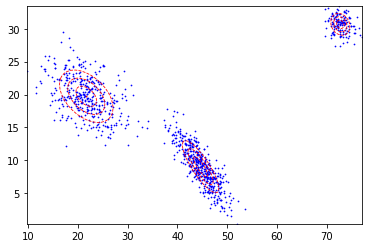

In [ ]:
# Apply EM on generated observations

# Parameters
nSteps = 30

# Recall that we have our observations X = sample(alpha0, mu0, sigma0)
fig, ax = plt.subplots()
alpha, mu, sigma = EM(X, m, nSteps)
print(" ")
print("This is the estimated alpha :")
print(alpha)
print(" ")
print("This is the estimated mu :")
print(mu)
print(" ")
print("This is the estimated sigma :")
print(sigma)
print(" ")
plot_gaussians(mu, sigma, ax)
plot_observations(X)
plt.show()

**Question 4**

Juste en observant les graphes, on peut constater que les résultats obtenus dans la question 3 sont similaires au résultats obtenus avec les vrais paramètres alpha, mu et sigma dans la question 2. Les paramètres estimés par l'algorithme EM ont l'air plutôt proche des  vrais paramètres.

In [ ]:
### Distance ###
# On définie la distance l2 entre deux vecteurs
def distl2(x,y) :
  return np.sqrt(np.sum((x-y)**2))

In [ ]:
distance = distl2(alpha,alpha0)
distance 

0.3846124951518315

N.B : je suis désolé mais je ne vois pas comment comparer la distance entre les matrices paramètres sigma et mu.

On peut voir que la distance entre le alpha estimé et le vrai alpha est de 0.38, ce qui est plutôt petit.

Cependant, en comparant les valeurs des sigmas et mu estimés avec les vrais paramètres on peut noter quelques différences importantes de valeurs.

Ainsi,  on en déduit que les paramètres estimés  ne sont pas si proches des vrais paramètres, bien que graphiquement les résultats aient l'air similaire.



**Question 5**

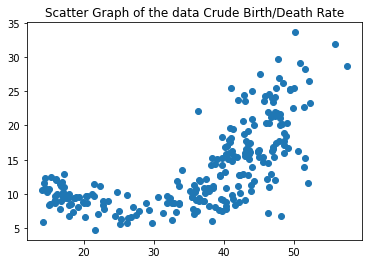

In [ ]:
##### Loading the data
import pandas as pd

df2 = pd.read_excel (r'/content/WPP2019_MORT_F02_CRUDE_DEATH_RATE.xlsx')
C=df2['Unnamed: 10']
death_rate=C.loc[C.apply(type) == float]
death_rate.dropna()

df3 = pd.read_excel (r'/content/WPP2019_FERT_F03_CRUDE_BIRTH_RATE.xlsx')
C=df3['Unnamed: 10']
birth_rate=C.loc[C.apply(type) == float]
birth_rate.dropna()

plt.title("Scatter Graph of the data Crude Birth/Death Rate")
plt.scatter(birth_rate,death_rate)

By looking at the scatter graph, there seems to be several groups of data. As we know, Gaussian mixture model is useful for modelling data that comes from one or several groups. Therefore using a gaussian mixture model seems appropriate here.

**Question 6**

In [ ]:
##### First off, we get rid of all the NaN values in birth and death rate
B = birth_rate.dropna(axis=0, how='any', inplace=False)
B = np.array(B)
D = death_rate.dropna(axis=0, how='any', inplace=False)
D = np.array(D)

In [ ]:
##### Now we create our sample X whose coordinates are the birth and death rates
X = []
for i in range (len(B)) :
  A = [B[i], D[i]]
  X.append(A)
X = np.array(X)

In [ ]:
# I redefine my EM algorithm because of an issue I encountered while running my notebook.

def EM(X, m, nSteps, verbose=True):
	n, d = X.shape
	# Mean of X
	mX = X.mean(0)
	# Covariance of X
	cX = X - mX
	sX = cX.T @ cX / len(X)
	# Initial parameters
	alpha = np.ones(m) / m
	mu = np.array([np.random.multivariate_normal(mX, sX) for _ in range(m)])
	sigma = np.array([sX / m**2] * m)
	# Function to center X with respect to mu
	centered = lambda: X.reshape(n, 1, d, 1) - mu.reshape(1, m, d, 1)
 
	for t in range(nSteps+1):
		# E step
		invSigma = np.linalg.pinv(sigma)
		detSigma = np.linalg.det(sigma)
		if t == 0: Xc = centered()
		cov = Xc.transpose((0, 1, 3, 2)) @ invSigma.reshape(1, m, d, d) @ Xc
		tau = np.exp(-0.5 * cov.reshape(n, m)) * alpha / (detSigma * (2*np.pi)**d + 1e-10) ** 0.5
		L = tau.sum(1)
		if t == nSteps: break
		tau /= L.reshape(n, 1)

		# M step
		alpha = tau.mean(0) + 1e-10
		alpha /= alpha.sum()
		mu = (tau.reshape(n, m, 1) * X.reshape(n, 1, d)).mean(0) / alpha.reshape(m, 1)
		Xc = centered()
		sigma = (tau.reshape(n, m, 1, 1) * (Xc @ Xc.transpose((0, 1, 3, 2)))).mean(0) / alpha.reshape(m, 1 ,1)
		#Result.append(-np.log(L).sum() + (m * np.log(n))/2)
	return alpha, mu, sigma

#Result = []

Now we can estimate the parameters $\theta$ for different values of m. We will study the cases where m = 1, 2, 3, 4, 5, 6.

This is the estimated alpha :
[1.]
 
This is the estimated mu :
[[35.69078486 13.70190438]]
 
This is the estimated sigma :
[[[137.17521748  46.62174763]
  [ 46.62174763  35.94933738]]]
 


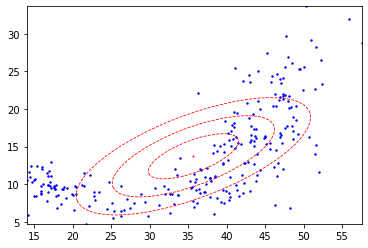

In [ ]:
##### for m = 1 cluster
m = 1 
nSteps = 40

fig, ax = plt.subplots()
alphaB, muB, sigmaB = EM(X, m, nSteps) 

print("This is the estimated alpha :")
print(alphaB)
print(" ")
print("This is the estimated mu :")
print(muB)
print(" ")
print("This is the estimated sigma :")
print(sigmaB)
print(" ")
plot_gaussians(muB, sigmaB, ax)
plot_observations(X)
plt.show()

This is the estimated alpha :
[0.398      0.12371542 0.47828458]
 
This is the estimated mu :
[[15.38948362 31.2906191 ]
 [35.31404941  6.47199912]
 [40.9226134  14.81199933]]
 
This is the estimated sigma :
[[[ 9.04382878  3.15981879]
  [ 3.15981879 19.27110899]]

 [[ 3.66514409 -0.14563538]
  [-0.14563538  4.92443907]]

 [[ 7.72470435 -9.71138314]
  [-9.71138314 21.69240911]]]
 


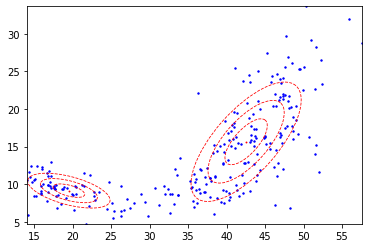

In [ ]:
##### for m = 2 clusters
m = 2
nSteps = 40

fig, ax = plt.subplots()
alphaB, muB, sigmaB = EM(X, m, nSteps) 

print("This is the estimated alpha :")
print(alpha)
print(" ")
print("This is the estimated mu :")
print(mu)
print(" ")
print("This is the estimated sigma :")
print(sigma)
print(" ")
plot_gaussians(muB, sigmaB, ax)
plot_observations(X)
plt.show()

This is the estimated alpha :
[0.398      0.12371542 0.47828458]
 
This is the estimated mu :
[[15.38948362 31.2906191 ]
 [35.31404941  6.47199912]
 [40.9226134  14.81199933]]
 
This is the estimated sigma :
[[[ 9.04382878  3.15981879]
  [ 3.15981879 19.27110899]]

 [[ 3.66514409 -0.14563538]
  [-0.14563538  4.92443907]]

 [[ 7.72470435 -9.71138314]
  [-9.71138314 21.69240911]]]
 


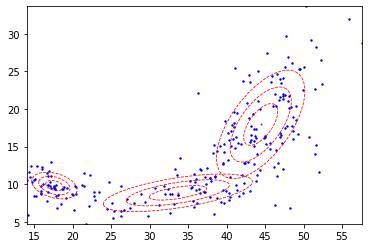

In [ ]:
##### for m = 3 clusters
m = 3
nSteps = 40

fig, ax = plt.subplots()
alphaB, muB, sigmaB = EM(X, m, nSteps) 

print("This is the estimated alpha :")
print(alpha)
print(" ")
print("This is the estimated mu :")
print(mu)
print(" ")
print("This is the estimated sigma :")
print(sigma)
print(" ")
plot_gaussians(muB, sigmaB, ax)
plot_observations(X)
plt.show()

This is the estimated alpha :
[0.398      0.12371542 0.47828458]
 
This is the estimated mu :
[[15.38948362 31.2906191 ]
 [35.31404941  6.47199912]
 [40.9226134  14.81199933]]
 
This is the estimated sigma :
[[[ 9.04382878  3.15981879]
  [ 3.15981879 19.27110899]]

 [[ 3.66514409 -0.14563538]
  [-0.14563538  4.92443907]]

 [[ 7.72470435 -9.71138314]
  [-9.71138314 21.69240911]]]
 


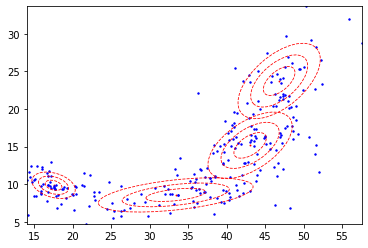

In [ ]:
##### for m = 4 clusters
m = 4
nSteps = 40

fig, ax = plt.subplots()
alphaB, muB, sigmaB = EM(X, m, nSteps) 

print("This is the estimated alpha :")
print(alpha)
print(" ")
print("This is the estimated mu :")
print(mu)
print(" ")
print("This is the estimated sigma :")
print(sigma)
print(" ")
plot_gaussians(muB, sigmaB, ax)
plot_observations(X)
plt.show()

This is the estimated alpha :
[0.398      0.12371542 0.47828458]
 
This is the estimated mu :
[[15.38948362 31.2906191 ]
 [35.31404941  6.47199912]
 [40.9226134  14.81199933]]
 
This is the estimated sigma :
[[[ 9.04382878  3.15981879]
  [ 3.15981879 19.27110899]]

 [[ 3.66514409 -0.14563538]
  [-0.14563538  4.92443907]]

 [[ 7.72470435 -9.71138314]
  [-9.71138314 21.69240911]]]
 


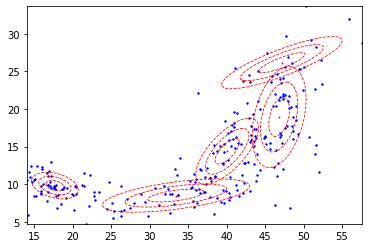

In [ ]:
##### for m = 5 clusters
m = 5
nSteps = 40

fig, ax = plt.subplots()
alphaB, muB, sigmaB = EM(X, m, nSteps) 

print("This is the estimated alpha :")
print(alpha)
print(" ")
print("This is the estimated mu :")
print(mu)
print(" ")
print("This is the estimated sigma :")
print(sigma)
print(" ")
plot_gaussians(muB, sigmaB, ax)
plot_observations(X)
plt.show()

This is the estimated alpha :
[0.398      0.12371542 0.47828458]
 
This is the estimated mu :
[[15.38948362 31.2906191 ]
 [35.31404941  6.47199912]
 [40.9226134  14.81199933]]
 
This is the estimated sigma :
[[[ 9.04382878  3.15981879]
  [ 3.15981879 19.27110899]]

 [[ 3.66514409 -0.14563538]
  [-0.14563538  4.92443907]]

 [[ 7.72470435 -9.71138314]
  [-9.71138314 21.69240911]]]
 


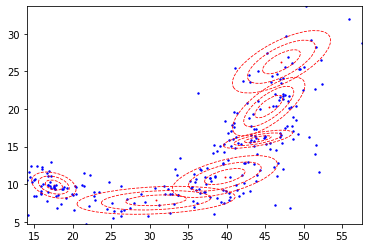

In [ ]:
##### for m = 6 clusters
m = 6
nSteps = 40

fig, ax = plt.subplots()
alphaB, muB, sigmaB = EM(X, m, nSteps) 

print("This is the estimated alpha :")
print(alpha)
print(" ")
print("This is the estimated mu :")
print(mu)
print(" ")
print("This is the estimated sigma :")
print(sigma)
print(" ")
plot_gaussians(muB, sigmaB, ax)
plot_observations(X)
plt.show()

This is the estimated alpha :
[0.398      0.12371542 0.47828458]
 
This is the estimated mu :
[[15.38948362 31.2906191 ]
 [35.31404941  6.47199912]
 [40.9226134  14.81199933]]
 
This is the estimated sigma :
[[[ 9.04382878  3.15981879]
  [ 3.15981879 19.27110899]]

 [[ 3.66514409 -0.14563538]
  [-0.14563538  4.92443907]]

 [[ 7.72470435 -9.71138314]
  [-9.71138314 21.69240911]]]
 


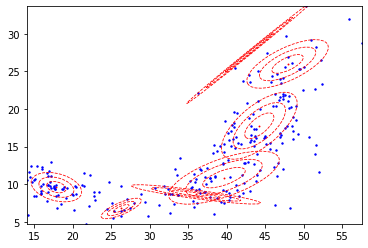

In [ ]:
##### for m = 7 clusters
m = 7
nSteps = 40

fig, ax = plt.subplots()
alphaB, muB, sigmaB = EM(X, m, nSteps) 

print("This is the estimated alpha :")
print(alpha)
print(" ")
print("This is the estimated mu :")
print(mu)
print(" ")
print("This is the estimated sigma :")
print(sigma)
print(" ")
plot_gaussians(muB, sigmaB, ax)
plot_observations(X)
plt.show()

# **Exercise 3**

# 3.A Poor importance sampling

**Question1**

We notice that $q(x) = 2 \times \mathcal{N}(x;0.8,1.5)$.

Therefore generating a sample from q is tantamount to generating a sample from $2 \times$ $\mathcal{N}(0.8,1.5)$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# We define the functions f, p and q

def f(x) :
  return 2*np.sin(np.pi*x / 1.5)* (x>=0)

def p(x) :
  return x**(1.65-1) * np.exp(-x**2/2) * (x >= 0)

def q(x) :
  return (2/np.sqrt(2*np.pi*1.5)) * np.exp(-((0.8-x)**2) / 2*1.5) 

In [ ]:
def generate_sampleq(n,mu,sigma) :
  # function that samples from q
  sample =[]
  k = n 
  while k!= 0 :
    A = 2 * np.random.normal(mu, sigma)
    if A >= 0 :
      sample.append(A)
      k -= 1

  sample = np.array(sample)
  return sample

def importance_weights(sample) :
  w =[]
  for i in range(len(sample)) :
    A = p(sample[i])/q(sample[i])
    w.append(A)

  w = np.array(w)
  return w

def normalizedw(w) :
  wt = []
  for i in range(len(w)) :
    A = w[i]/ np.sum(w)
    wt.append(A)

  wt = np.array(wt)
  return wt

def estimatef(sample, wt) :
  F = []
  for i in range(len(sample)) :
    A = wt[i] * f(sample[i])
    F.append(A)

  F = np.array(F)
  estf = np.sum(F)
  return estf



In [ ]:
# Parameters
mu, sigma = 0.8, np.sqrt(1.5) # mean and standard deviation
n = 10

# We generate a sample from q
sample = generate_sampleq(n, mu, sigma)

# We compute the importance weights
w = importance_weights(sample)

# Now we compute the normalized importance weights
wt = normalizedw(w)

# Hence, we can approximate the expectation of f
Estimate = estimatef(sample,wt)

In [ ]:
print(Estimate)

1.1319787553847613


**Question 2**

Let's compare the estimate for several size n =10, 100, 1000, 10000

In [ ]:
# For n = 10 
sample = generate_sampleq(n, mu, sigma)
w = importance_weights(sample)
wt = normalizedw(w)
estimate = estimatef(sample,wt)

In [ ]:

print(" ")
print(" importance weights :")
print(w)
print(" ")
print(" normalized importance weights :")
print(wt) 
print(" ")
print(" estimate :")
print(estimate)

 
 importance weights :
[19.93625482  0.98271057  0.96103532  2.84630732 17.64756384  0.94243353
  0.88482511  3.08442524 43.03848733  0.95892335]
 
 normalized importance weights :
[0.2184006  0.01076554 0.01052809 0.03118114 0.19332812 0.01032431
 0.00969321 0.03378971 0.47148432 0.01050495]
 
 estimate :
-0.7073489524773563


In [ ]:
# For n = 100
n = 100
sample = generate_sampleq(n, mu, sigma)
w = importance_weights(sample)
wt = normalizedw(w)
estimate = estimatef(sample,wt)

In [ ]:
print(" estimate for n = 100 :")
print(estimate)

 estimate for n = 100 :
1.2099749251361944


In [ ]:
# For n = 1000
n = 1000
sample = generate_sampleq(n, mu, sigma)
w = importance_weights(sample)
wt = normalizedw(w)
estimate = estimatef(sample,wt)

In [ ]:
print(" estimate for n = 1000 :")
print(estimate)

 estimate for n = 1000 :
-0.42827606345294983


In [ ]:
# For n = 10000
n = 10000
sample = generate_sampleq(n, mu, sigma)
w = importance_weights(sample)
wt = normalizedw(w)
estimate = estimatef(sample,wt)

In [ ]:
print(" estimate for n = 10000 :")
print(estimate)

 estimate for n = 10000 :
-0.24529230306457558


**Question 3**

In [ ]:
# We shift the mean of q to mu = 6
def q(x) :
  return (2/np.sqrt(2*np.pi*1.5)) * np.exp(-((6-x)**2) / 2*1.5) 

In [ ]:
# Parameters : we change mu to 6
mu, sigma = 6, np.sqrt(1.5) 

In [ ]:
###### We repeat the experiment
# For n = 10
n = 10
sample = generate_sampleq(n, mu, sigma)
w = importance_weights(sample)
wt = normalizedw(w)
estimate = estimatef(sample,wt)

In [ ]:
estimate

0.7781644752035285

In [ ]:
# for n = 100
n = 100
sample = generate_sampleq(n, mu, sigma)
w = importance_weights(sample)
wt = normalizedw(w)
estimate = estimatef(sample,wt)

In [ ]:
estimate

1.0351875942381916

In [ ]:
# For n = 1000
n = 1000
sample = generate_sampleq(n, mu, sigma)
w = importance_weights(sample)
wt = normalizedw(w)
estimate = estimatef(sample,wt)

In [ ]:
estimate

-1.9360852576341698

In [ ]:
# For n = 10000
n = 10000
sample = generate_sampleq(n, mu, sigma)
w = importance_weights(sample)
wt = normalizedw(w)
estimate = estimatef(sample,wt)

In [ ]:
estimate

0.32924167552405903

# 3.B Adaptative importance sampling

**Question 4**

Step (iii) de l'algorithme de Population Monte Carlo consiste à maximiser :

$$ \sum_{i = 1}^n \tilde{w_{i}}  \log \left( \sum_{j = 1}^m \alpha_j \varphi(X_i; \theta_j) \right) $$


Ce qui ressemble beaucoup à la log-vraisemblance calculé dans de l'exercice 2 et sur laquelle est basé l'algorithme EM :

$$ L(x_1,...,x_n; \theta) = \sum_{i = 1}^n \log [\sum_{j = 1}^m \mathcal{N}(x_i ; \mu_j,\Sigma_j ) \alpha_j]$$

Ainsi, on voit très clairement que l'algorithme EM peut être utilisé pour le problème de maximisation du step (iii) de l'algorithme de Population Monte Carlo, il suffit juste de multiplier les $\log [\sum_{j = 1}^m \mathcal{N}(x_i ; \mu_j,\Sigma_j ) \alpha_j]$ avec les poids $\tilde{w_{i}}$.

Ainsi, en incorporant les poids  $\tilde{w_{i}}$ dans l'algorithme EM, on obtient le nouveau $\theta_{t+1}$ à l'étape M suivant :

$$ \hat{\alpha_j} = \dfrac{1}{n} \sum_{i = 1}^n \tilde{w_{i}}\tau_{ij}^t $$

$ $

$$ \hat{\mu_j} = \dfrac{1}{\sum_{i = 1}^n \tau_{ij}^t\tilde{w_{i}}} \sum_{i = 1}^n \tau_{ij}^t x_i\tilde{w_{i}} $$

$$ \hat{\Sigma_j} = \dfrac{1}{\sum_{i = 1}^n \tau_{ij}^t\tilde{w_{i}}} \sum_{i = 1}^n \tau_{ij}^t \tilde{w_{i}} (x_i - \mu_j) (x_i - \mu_j)^T $$




# 3.C  Application to a "banana"-shaped density

In [1]:
def N(x, d, mu, sigma) :
  n = len(x)
  invSigma = np.linalg.pinv(sigma)
	#detSigma = np.linalg.det(sigma)
  detSigma = np.linalg.det(sigma)
  X = x - mu
  return np.exp(-0.5 * X.T @ invSigma.reshape(1, m, d, d) @ X) / (detSigma * (2*np.pi)**d + 1e-10) ** 0.5

def q_gauss(x, d, alpha, mu, sigma) :
  Q = np.array([ alpha[i] * N(x,d,mu,sigma) for i in range(len(x))])
  return Q.sum()

def p_new(x, d, alpha, mu, sigma) :
  Xnew = x
  Xnew[1] = x[1] + b(x[0]**2 - sigma1**2)

  Q = np.array([ alpha[i] * N(Xnew,d,mu,sigma) for i in range(len(Xnew))])
  return Q.sum()

In [ ]:
##### New EM Algorithm

def new_EM(X, m, nSteps, verbose=True):
	n, d = X.shape
	# Mean of X
	mX = X.mean(0)
	# Covariance of X
	cX = X - mX
	sX = cX.T @ cX / len(X)
	# Initial parameters
	alpha = np.ones(m) / m
	mu = np.array([np.random.multivariate_normal(mX, sX) for _ in range(m)])
	sigma = np.array([sX / m**2] * m)
	# Function to center X with respect to mu
	centered = lambda: X.reshape(n, 1, d, 1) - mu.reshape(1, m, d, 1)
 
	for t in range(nSteps+1):
		# E step
		invSigma = np.linalg.pinv(sigma)
		detSigma = np.linalg.det(sigma)
		if t == 0: Xc = centered()
		cov = Xc.transpose((0, 1, 3, 2)) @ invSigma.reshape(1, m, d, d) @ Xc
		tau = np.exp(-0.5 * cov.reshape(n, m)) * alpha / (detSigma * (2*np.pi)**d + 1e-10) ** 0.5
		L = tau.sum(1)
		if verbose: print("log-likelihood:", np.log(L).sum())
		if t == nSteps: break
		tau /= L.reshape(n, 1)

		# M step
    w = np.array([ p_new(X[i])/q_gauss(X[i]) for i in range(len(X))])
		wt = []
	 	for i in range(len(w)) :
    	A = w[i]/ np.sum(w)
    	wt.append(A)
		wt = np.array(wt)

		alp = np.array([ wt[i] * tau[i] for i in range(len(wt))])
		alpha = (1/n) * np.sum(alp)	
		mu = (tau.reshape(n, m, 1) * X.reshape(n, 1, d) * wt.reshape(n,1,d)).mean(0) / np.sum(alp)
		Xc = centered()
		sigma = (wt.reshape(n, 1, d) * tau.reshape(n, m, 1, 1) * (Xc @ Xc.transpose((0, 1, 3, 2)))).mean(0) / np.sum(alp)
	return alpha, mu, sigma

I am stuck here ! I don't succeed in running my code because of a mistake that I've tried to fix but in vain

Même si mon code ne fonctionne pas très bien, je vais quand même définir la fonction de l'algorithme Population Monte Carlo :

In [ ]:
def populationMC(alpha, mu, sigma) :
  for i in range(500) :  # I choose 500 iterations so that the algorithm has time to converge
    X = sample(alpha, mu, sigma)
    alphanew, munew, sigmanew = new_EM(X, m, nSteps) # où new_EM() est l'algorithme EM revisité pour le step(iii) de l'algo population Monte Carlo
    alpha = alphanew
    mu = munew
    sigma = sigmanew
  return alpha, mu, sigma

Cette algorithme renvoie au final les paramètres alpha, mu et sigma qui nous permettent d'approximer la solution $q_{\theta^{*}}$.

In [ ]:




# Parameters
nSteps = 30

# Recall that we have our observations X = sample(alpha0, mu0, sigma0)
fig, ax = plt.subplots()
alpha, mu, sigma = EM(X, m, nSteps)
print(" ")
print("This is the estimated alpha :")
print(alpha)
print(" ")
print("This is the estimated mu :")
print(mu)
print(" ")
print("This is the estimated sigma :")
print(sigma)
print(" ")
plot_gaussians(mu, sigma, ax)
plot_observations(X)
plt.show()